Dataset shape: (30000, 25)

First few rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default  

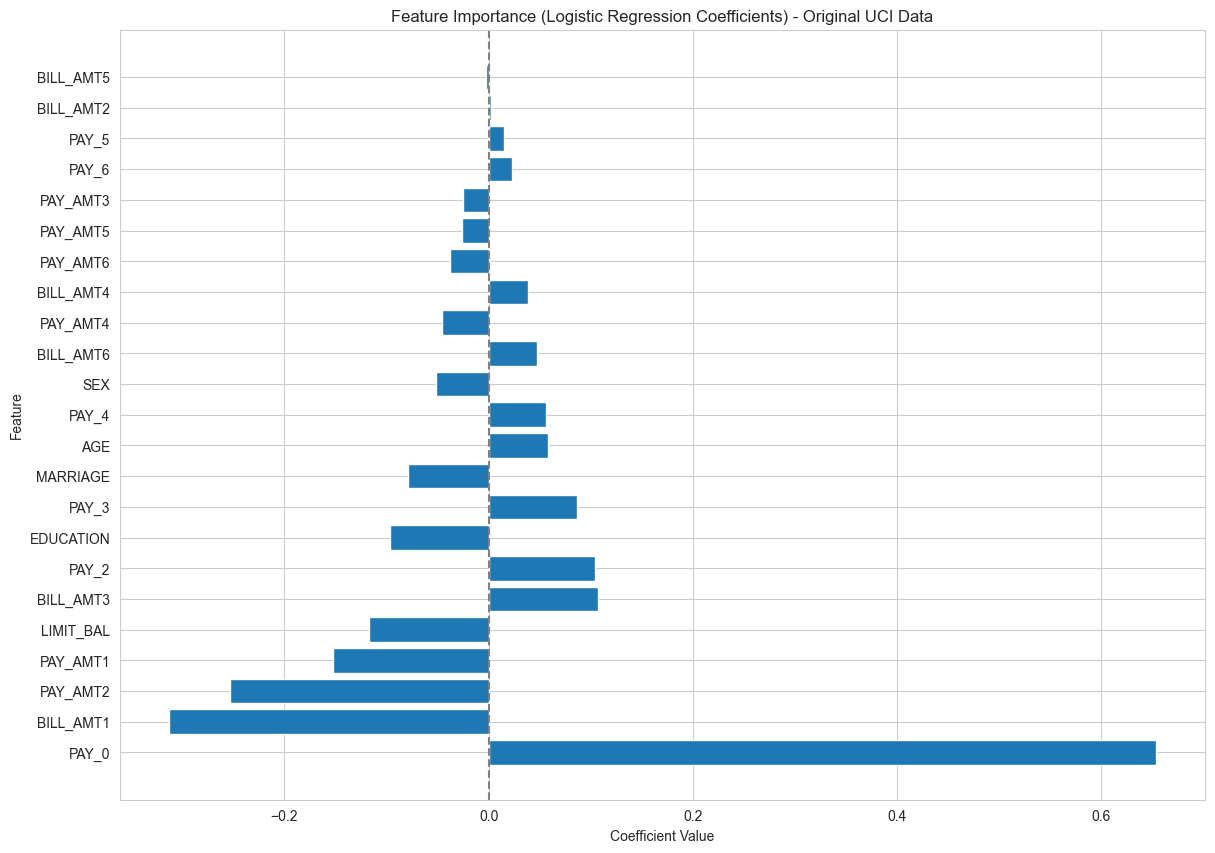


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.35      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000



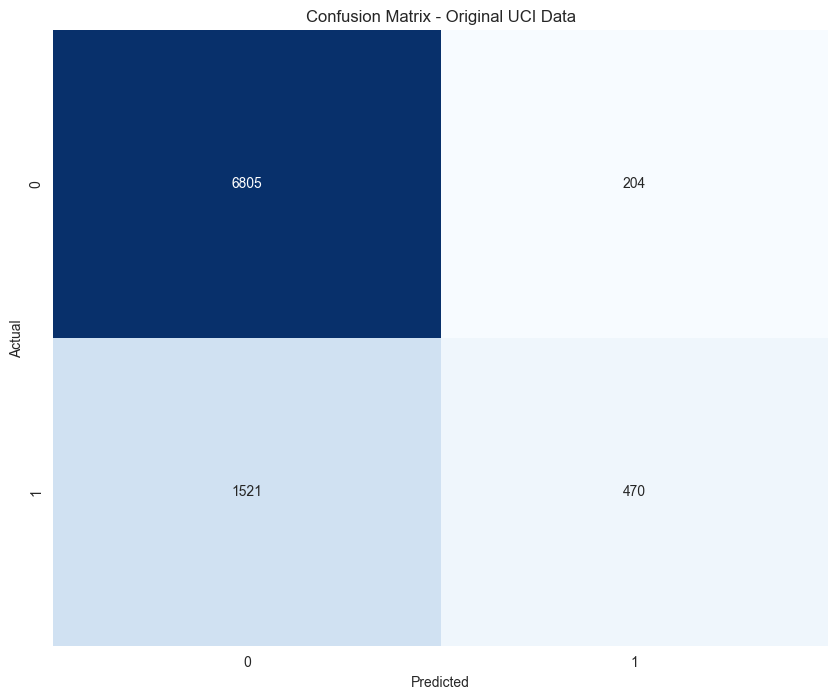

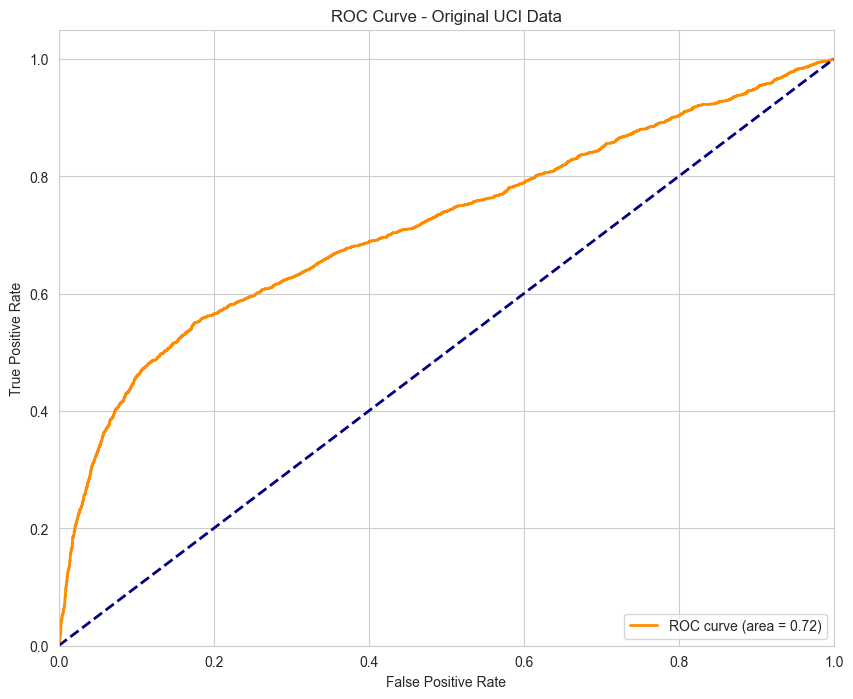

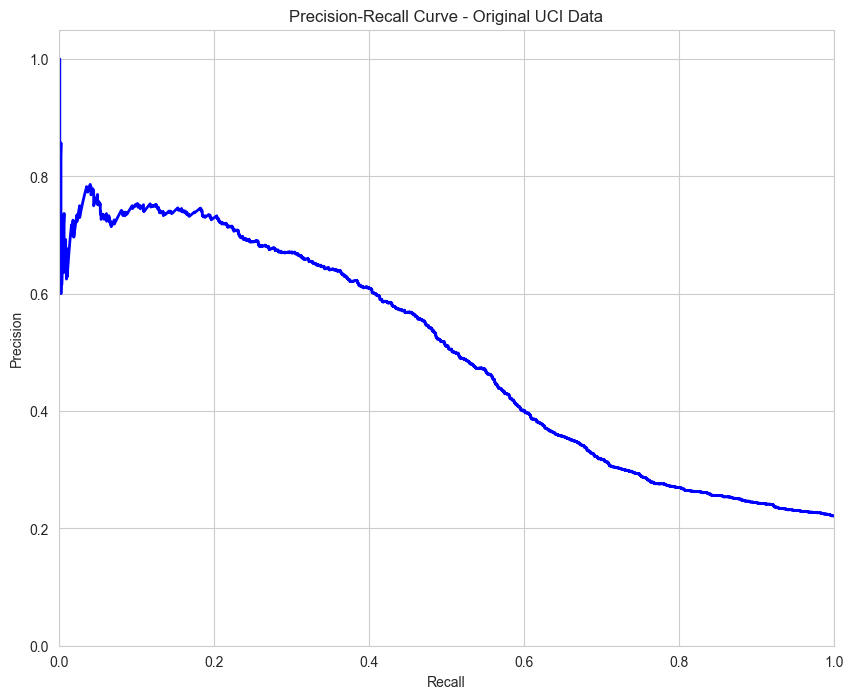

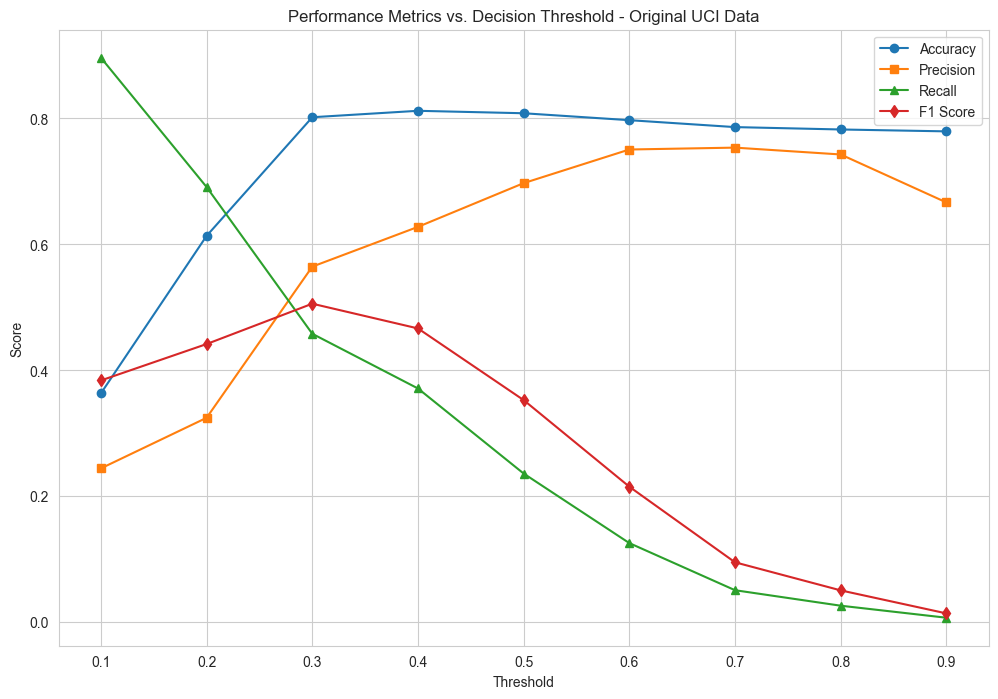

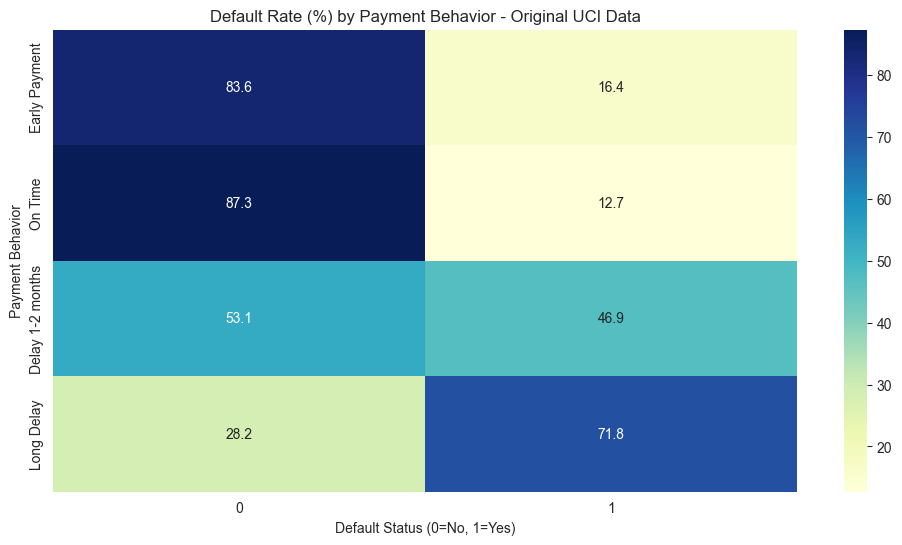


Model training and evaluation on original UCI data complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the original UCI dataset
df = pd.read_csv('./data/UCI_Credit_Card.csv')

# Rename the target variable for consistency
df = df.rename(columns={"default.payment.next.month": "default"})

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Separate features and target
X = df.drop(['ID', 'default'], axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate feature importance
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 10))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression Coefficients) - Original UCI Data')
plt.axvline(x=0, color='gray', linestyle='--')
plt.savefig('./img/feature_importance_lr_original.png')
plt.show()

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Original UCI Data')
plt.savefig('./img/confusion_matrix_original.png')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Original UCI Data')
plt.legend(loc='lower right')
plt.savefig('./img/roc_curve_original.png')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Original UCI Data')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.savefig('./img/precision_recall_curve_original.png')
plt.show()

# Plot the decision threshold analysis
thresholds = np.arange(0.1, 1, 0.1)
accuracy = []
precision_scores = []
recall_scores = []
f1_scores = []

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    accuracy.append(accuracy_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

plt.figure(figsize=(12, 8))
plt.plot(thresholds, accuracy, label='Accuracy', marker='o')
plt.plot(thresholds, precision_scores, label='Precision', marker='s')
plt.plot(thresholds, recall_scores, label='Recall', marker='^')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='d')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Decision Threshold - Original UCI Data')
plt.legend()
plt.grid(True)
plt.savefig('./img/threshold_analysis_original.png')
plt.show()

# Analyze model performance by payment behavior
# Create a new feature representing average payment delay
df['avg_payment_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Let's categorize the delay
bins = [-10, -1, 0, 2, 8]
labels = ['Early Payment', 'On Time', 'Delay 1-2 months', 'Long Delay']
df['payment_behavior'] = pd.cut(df['avg_payment_delay'], bins=bins, labels=labels)

# Create a heatmap of default rates by payment behavior
payment_default = pd.crosstab(df['payment_behavior'], df['default'])
payment_default_pct = payment_default.div(payment_default.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
sns.heatmap(payment_default_pct, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Default Rate (%) by Payment Behavior - Original UCI Data')
plt.ylabel('Payment Behavior')
plt.xlabel('Default Status (0=No, 1=Yes)')
plt.savefig('./img/default_by_payment_original.png')
plt.show()

# Compare top influential features between original and synthetic data
# Optional - you can add this if you've also run the synthetic data model
try:
    # Try to load feature importance from synthetic model if it exists
    synthetic_coef_df = pd.read_csv('./img/synthetic_feature_importance.csv')
    
    # Compare top 10 features
    plt.figure(figsize=(14, 10))
    
    plt.subplot(1, 2, 1)
    top_original = coef_df.head(10)
    plt.barh(top_original['Feature'], top_original['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Top Features - Original Data')
    
    plt.subplot(1, 2, 2)
    top_synthetic = synthetic_coef_df.head(10)
    plt.barh(top_synthetic['Feature'], top_synthetic['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.title('Top Features - Synthetic Data')
    
    plt.tight_layout()
    plt.savefig('./img/feature_comparison.png')
    plt.show()
except:
    # Skip comparison if synthetic model results don't exist
    pass

print("\nModel training and evaluation on original UCI data complete!")